In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [2]:
raw_data = pd.read_excel('./sleep_data.xlsx')
raw_data.rename(columns={'신장':'height', '체중':'weight'}, inplace=True)
raw_data.head()

/var/folders/l6/j5nwgjg11zqbq0y11b2myyb00000gn/T/ipykernel_23453/2908898885.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  raw_data = pd.read_excel('./sleep_data.xlsx')


,ID,PSG_date,PSG_ID,sex,age,birth,Final Diagnosis,OSA,insomnia,"PLMD, RLS",...,Lowest SaO2 (%),ODI,90%ODI,EtCO2\n(>50mmHg),Total \nLMI =PLMI(/h),Total LM \nArousal#,Total LM AI(/h),PLM \nArousal#,PLM \nAI(/h),MAI(/h)
0,1,2014-12-10,N14005,1,52,1962-02-26,sleep talking,0,0,0,...,97.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014-12-10,PE141015,0,65,1948-12-17,RLS/OSA,1,0,1,...,87.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN,NaN,NaN
2,3,2014-12-10,PE141017,0,53,1961-02-28,OSA,1,0,0,...,87.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN,NaN,NaN
3,4,2014-12-10,PE141014,0,53,1961-06-01,OSA/PPI,1,1,0,...,86.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-03-31,PE150253,1,55,1959-12-19,OSA,1,0,0,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3


In [3]:
raw_data.columns = raw_data.columns.str.replace(' \n', ' ')
raw_data.columns = raw_data.columns.str.replace('\n', ' ')
raw_data.head()

,ID,PSG_date,PSG_ID,sex,age,birth,Final Diagnosis,OSA,insomnia,"PLMD, RLS",...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
0,1,2014-12-10,N14005,1,52,1962-02-26,sleep talking,0,0,0,...,97.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2014-12-10,PE141015,0,65,1948-12-17,RLS/OSA,1,0,1,...,87.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN,NaN,NaN
2,3,2014-12-10,PE141017,0,53,1961-02-28,OSA,1,0,0,...,87.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN,NaN,NaN
3,4,2014-12-10,PE141014,0,53,1961-06-01,OSA/PPI,1,1,0,...,86.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2015-03-31,PE150253,1,55,1959-12-19,OSA,1,0,0,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3


### ID, PSG_date, PSG_ID, birth drop

In [4]:
data = raw_data.copy()
data.drop(['ID', 'PSG_date', 'PSG_ID', 'birth'], axis=1, inplace=True)
data.head()

,sex,age,Final Diagnosis,OSA,insomnia,"PLMD, RLS",parasomnia,circadian rhythm sleep-wake disorder,"Narcolepsy, EDS, Hypersomnia",Catathrenia,...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
0,1,52,sleep talking,0,0,0,0,0,0,0,...,97.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,65,RLS/OSA,1,0,1,0,0,0,0,...,87.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN,NaN,NaN
2,0,53,OSA,1,0,0,0,0,0,0,...,87.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN,NaN,NaN
3,0,53,OSA/PPI,1,1,0,0,0,0,0,...,86.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,55,OSA,1,0,0,0,0,0,0,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3


In [5]:
data[data['Lateral Apnea Index(/h)'].apply(lambda x: isinstance(x, str))]

,sex,age,Final Diagnosis,OSA,insomnia,"PLMD, RLS",parasomnia,circadian rhythm sleep-wake disorder,"Narcolepsy, EDS, Hypersomnia",Catathrenia,...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
5076,1,62,OSA,1,0,0,0,0,0,0,...,81.0,40.8,18.1,0.0,11.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.drop([5076], inplace=True)
data.reset_index(drop=True, inplace=True)
data[data['Lateral Apnea Index(/h)'].apply(lambda x: isinstance(x, str))]

,sex,age,Final Diagnosis,OSA,insomnia,"PLMD, RLS",parasomnia,circadian rhythm sleep-wake disorder,"Narcolepsy, EDS, Hypersomnia",Catathrenia,...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)


In [7]:
data['Lateral Apnea Index(/h)'] = data['Lateral Apnea Index(/h)'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 86 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   sex                                   5480 non-null   int64  
 1   age                                   5480 non-null   int64  
 2   Final Diagnosis                       5480 non-null   object 
 3   OSA                                   5480 non-null   int64  
 4   insomnia                              5480 non-null   int64  
 5   PLMD, RLS                             5480 non-null   int64  
 6   parasomnia                            5480 non-null   int64  
 7   circadian rhythm sleep-wake disorder  5480 non-null   int64  
 8   Narcolepsy, EDS, Hypersomnia          5480 non-null   int64  
 9   Catathrenia                           5480 non-null   int64  
 10  control                               5480 non-null   int64  
 11  height           

## 진단별 빈도 수 확인

In [8]:
# missing data check
for column in data.iloc[:, 3:10].columns:
    print(f"{column}: {data[data[column] == 999].index}")

OSA: Int64Index([3570], dtype='int64')
insomnia: Int64Index([3570], dtype='int64')
PLMD, RLS: Int64Index([], dtype='int64')
parasomnia: Int64Index([], dtype='int64')
circadian rhythm sleep-wake disorder: Int64Index([], dtype='int64')
Narcolepsy, EDS, Hypersomnia: Int64Index([], dtype='int64')
Catathrenia: Int64Index([3570], dtype='int64')


In [9]:
data.drop([3570], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,sex,age,Final Diagnosis,OSA,insomnia,"PLMD, RLS",parasomnia,circadian rhythm sleep-wake disorder,"Narcolepsy, EDS, Hypersomnia",Catathrenia,...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
0,1,52,sleep talking,0,0,0,0,0,0,0,...,97.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,65,RLS/OSA,1,0,1,0,0,0,0,...,87.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN,NaN,NaN
2,0,53,OSA,1,0,0,0,0,0,0,...,87.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN,NaN,NaN
3,0,53,OSA/PPI,1,1,0,0,0,0,0,...,86.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,55,OSA,1,0,0,0,0,0,0,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3


/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


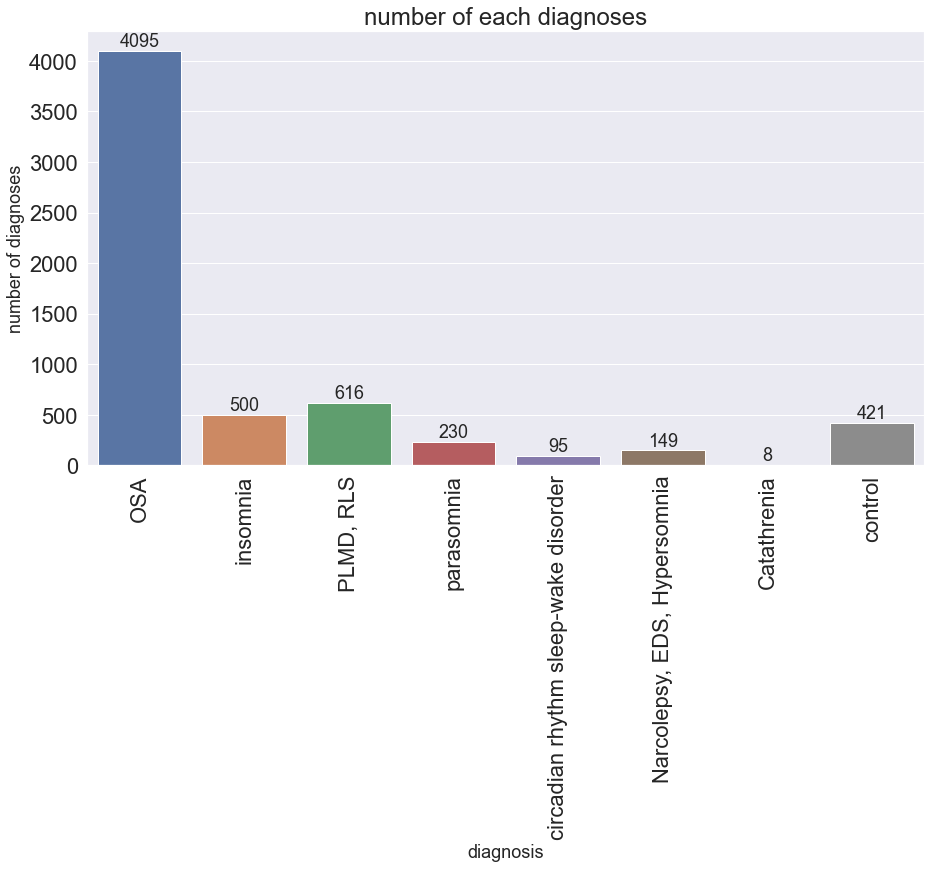

In [10]:
categories = list(data.iloc[:, 3:11].columns.values)

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))

ax = sns.barplot(categories, data.iloc[:, 3:11].sum().values)

plt.title("number of each diagnoses", fontsize=24)
plt.ylabel('number of diagnoses', fontsize=18)
plt.xlabel('diagnosis', fontsize=18)

rects = ax.patches
labels = data.iloc[:, 3:11].sum().values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha='center', va='bottom', fontsize=18)
plt.xticks(rotation=90)
plt.show()

### 진단을 2개 이상 받거나 아예 받지 않은 경우의 빈도수

/Users/hannahan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


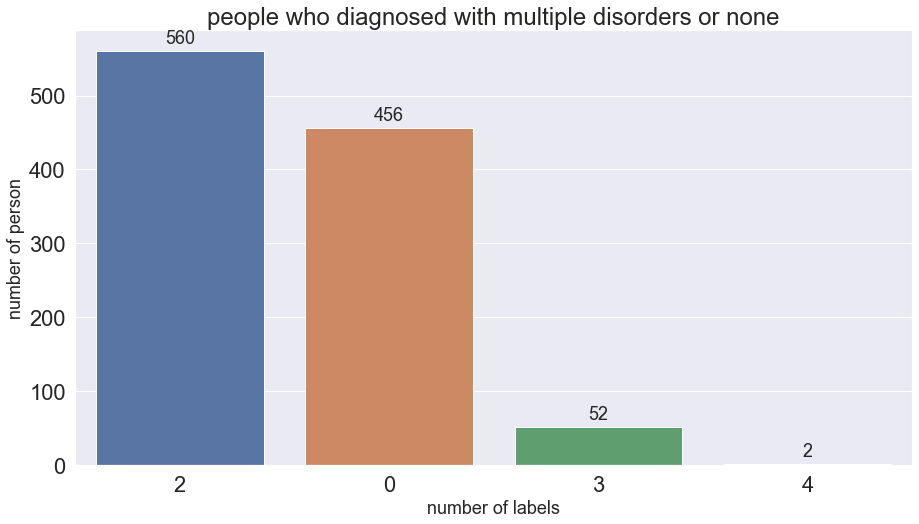

In [11]:
row_sums = data.iloc[:, 3:10].sum(axis=1)
multilabel_counts = row_sums.value_counts()
multilabel_counts = multilabel_counts.iloc[1:]

sns.set(font_scale=2)
plt.figure(figsize=(15, 8))

ax = sns.barplot(multilabel_counts.index, multilabel_counts.values, order=multilabel_counts.index)
plt.title("people who diagnosed with multiple disorders or none")
plt.ylabel('number of person', fontsize=18)
plt.xlabel('number of labels', fontsize=18)

rects = ax.patches
labels = multilabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

- control이 1(수면장애 없음)인 수는 421
- control을 제외한 labels의 합이 0인 수는 456

== 35명은 label에 없는 다른 병을 가지고 있음...?

In [12]:
all_zeros = data.loc[(data['OSA'] == 0) & (data['insomnia'] == 0) & (data['PLMD, RLS'] == 0) & (data['parasomnia'] == 0) & (data['circadian rhythm sleep-wake disorder'] == 0) & (data['Narcolepsy, EDS, Hypersomnia'] == 0) & (data['Catathrenia'] == 0) & (data['control'] == 0)].index
len(all_zeros)

35

In [13]:
data.iloc[all_zeros, 2:11]

,Final Diagnosis,OSA,insomnia,"PLMD, RLS",parasomnia,circadian rhythm sleep-wake disorder,"Narcolepsy, EDS, Hypersomnia",Catathrenia,control
33,Epilepsy,0,0,0,0,0,0,0,0
142,UARS,0,0,0,0,0,0,0,0
266,UARS,0,0,0,0,0,0,0,0
332,UARS/Depress,0,0,0,0,0,0,0,0
344,depression,0,0,0,0,0,0,0,0
570,UARS,0,0,0,0,0,0,0,0
639,r.o PPI,0,0,0,0,0,0,0,0
641,r.o PPI,0,0,0,0,0,0,0,0
721,UARS,0,0,0,0,0,0,0,0
834,r.o PPI,0,0,0,0,0,0,0,0


category로 분류 안 되는 수면 장애를 진단 받은 사람 수: 35

## OSA data

In [14]:
osa_data = data.drop(['Final Diagnosis'] + data.iloc[:, 4:11].columns.values.tolist(), axis=1)
osa_data.head()

,sex,age,OSA,height,weight,BMI,Time in Bed(min),Total sleep time(min),Sleep latency(min),N2 sleep latency(min),...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
0,1,52,0,167.0,60.0,21.51,376.5,276.5,31.0,0.0,...,97.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,65,1,166.0,53.0,19.23,513.1,248.0,107.5,0.0,...,87.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN,NaN,NaN
2,0,53,1,174.0,74.0,24.44,479.0,421.0,8.5,0.0,...,87.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN,NaN,NaN
3,0,53,1,163.0,63.5,23.90,464.0,343.0,14.0,0.0,...,86.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,55,1,150.0,61.0,27.11,464.5,417.0,1.5,1.5,...,88.0,0.0,0.0,0.0,3.2,2.0,0.3,0.0,0.0,0.3


In [15]:
numerical_osa_data = osa_data.drop(['sex', 'OSA'], axis=1)
numerical_osa_data.describe()

,age,height,weight,BMI,Time in Bed(min),Total sleep time(min),Sleep latency(min),N2 sleep latency(min),REM sleep latency(min),WASO(min),...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000,5479.00000,5478.000000,5479.000000,5478.000000,...,5444.000000,5479.000000,5479.000000,5479.000000,5343.000000,5272.000000,5272.000000,5271.000000,5271.000000,5272.000000
mean,50.810367,167.996021,73.129148,27.485583,431.501661,355.426720,12.13674,7.389011,104.387662,50.598357,...,84.538024,17.892663,6.473243,0.018799,10.489519,1.703149,0.293295,3.934168,0.693180,0.992242
std,14.911434,24.140964,36.285992,43.772167,52.672357,66.684098,18.98400,14.025512,64.199164,50.058176,...,8.159749,21.904523,15.582607,0.858835,21.037599,4.068668,0.702324,12.568402,2.223215,2.591902
min,7.000000,100.000000,30.000000,12.400000,96.900000,46.500000,0.00000,0.000000,0.000000,0.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,161.000000,62.000000,22.900000,403.000000,318.000000,3.00000,1.000000,65.500000,14.400000,...,81.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,168.000000,71.000000,25.100000,436.000000,362.000000,6.50000,3.500000,87.000000,38.500000,...,86.000000,9.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,174.000000,80.000000,27.640000,467.000000,402.500000,13.00000,7.500000,127.500000,72.000000,...,90.000000,27.650000,4.500000,0.000000,12.400000,2.000000,0.300000,1.000000,0.200000,0.700000
max,91.000000,999.000000,999.000000,999.000000,642.000000,537.500000,303.00000,224.000000,475.500000,410.000000,...,99.000000,141.900000,169.400000,44.500000,187.300000,129.000000,21.500000,218.000000,37.500000,38.800000


In [16]:
number_osa_data = osa_data.loc[:, osa_data.columns.str.contains("#")]
number_osa_data.head()

,Total Arousal #,Respriratory Arousal #,Snore Arousal #,RERA Arousal #,Spontaneous Arousal #,Movement Arousal #,Central apnea #,Mixed _apnea #,Obstructive apnea #,Total_ apnea #,Total_ Hypopnea#,Total A+H #,Total- RERA#,Total- A+H+RERA#,Total LM Arousal#,PLM Arousal#
0,52.0,1.0,0.0,0,0.0,0.0,0,0,0,0.0,1.0,1,0.0,1.0,NaN,NaN
1,88.0,37.0,0.0,0,0.0,6.0,0,0,22,22.0,19.0,41,7.0,48.0,NaN,NaN
2,200.0,160.0,0.0,0,0.0,0.0,2,4,103,109.0,110.0,219,29.0,248.0,NaN,NaN
3,131.0,86.0,1.0,0,0.0,0.0,0,0,8,8.0,102.0,110,24.0,134.0,NaN,NaN
4,84.0,20.0,2.0,0,0.0,2.0,0,0,1,1.0,70.0,71,17.0,88.0,2.0,0.0


In [17]:
index_osa_data = osa_data.loc[:, osa_data.columns.str.contains("Index|index|/h|ODI")]
index_osa_data.head()

,Total Aroual index(/h),Respiratory Aroual index(/h),Snore Aroual index(/h),RERA index(/h),Spontaneous Aroual index(/h),Movement Aroual index(/h),REM Arousal index(h),NREM Arousal index(h),Supine Arousal index(h),Lateral Arousal index(h),...,Supine0 A+H+RERA_Index(h),Lateral A+H+RERA_ Index(h),REM A+H+RERA Index(/h),NREM A+H+RERA Index(/h),ODI,90%ODI,Total LMI =PLMI(/h),Total LM AI(/h),PLM AI(/h),MAI(/h)
0,11.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,21.3,9.0,0.0,0.0,0.0,1.4,0.0,0.0,0.0,0.0,...,20.9,0.0,0.0,0.0,0.0,0.0,16.7,NaN,NaN,NaN
2,28.5,22.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.8,0.0,0.0,0.0,0.0,0.0,10.7,NaN,NaN,NaN
3,22.9,15.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26.8,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,12.1,2.9,0.3,0.0,0.0,0.3,7.0,0.0,0.0,11.3,...,15.4,2.1,0.0,0.0,0.0,0.0,3.2,0.3,0.0,0.3


In [18]:
percent_osa_data = osa_data.loc[:, osa_data.columns.str.contains("%|SaO2")]
percent_osa_data.drop(["90%ODI"], axis=1, inplace=True) # odi는 index
percent_osa_data.head()

/var/folders/l6/j5nwgjg11zqbq0y11b2myyb00000gn/T/ipykernel_23453/1722914501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_osa_data.drop(["90%ODI"], axis=1, inplace=True) # odi는 index


,WASO(%),NON REM/TST(%),N1/TST(%),N2/TST(%),N3/TST(%),REM/TST(%),sleep efficiency(%),Sleep time on Back(%),Resp. Arousal /(A+H)(%),Baseline waking SaO2,Baseline sleep SaO2,Lowest SaO2 (%)
0,0.0,79.4,17.0,62.0,0.4,20.6,73.5,49.5,100.0,99.0,99.0,97.0
1,0.0,83.7,23.2,60.5,0.0,16.3,48.3,50.6,90.2,97.0,97.0,87.0
2,0.0,71.0,29.0,42.0,0.0,29.0,87.9,67.1,73.1,96.0,96.0,87.0
3,0.0,78.4,27.3,48.5,2.6,21.6,73.9,66.7,78.2,97.0,96.0,86.0
4,9.9,73.4,10.8,48.3,14.3,26.6,89.8,79.7,28.2,96.0,95.0,88.0


In [19]:
minutes_osa_data = osa_data.loc[:, osa_data.columns.str.contains("min")]
minutes_osa_data.head()

,Time in Bed(min),Total sleep time(min),Sleep latency(min),N2 sleep latency(min),REM sleep latency(min),WASO(min)
0,376.5,276.5,31.0,0.0,93.5,0.0
1,513.1,248.0,107.5,0.0,132.0,0.0
2,479.0,421.0,8.5,0.0,79.0,0.0
3,464.0,343.0,14.0,0.0,122.5,0.0
4,464.5,417.0,1.5,1.5,34.5,46.0


In [20]:
seconds_osa_data = osa_data.loc[:, osa_data.columns.str.contains("sec")]
seconds_osa_data.head()

,Apnea_Max_ Length(sec),Hypopnea_Max_ Length(sec)
0,0.0,42.7
1,70.6,61.4
2,57.7,93.4
3,22.7,89.9
4,15.2,47.7


In [21]:
# EtCO2, 신장, 체중, BMI 4 feature 제외 -> 71
len(minutes_osa_data.columns) + len(percent_osa_data.columns) + len(index_osa_data.columns) + len(number_osa_data.columns) + len(seconds_osa_data.columns)

71

## OSA 기준으로 barplot 시각화

In [23]:
data_diag = osa_data['OSA'].copy()

(array([0, 1]),
 [Text(0, 0, 'REM sleep latency(min)'), Text(1, 0, 'WASO(min)')])

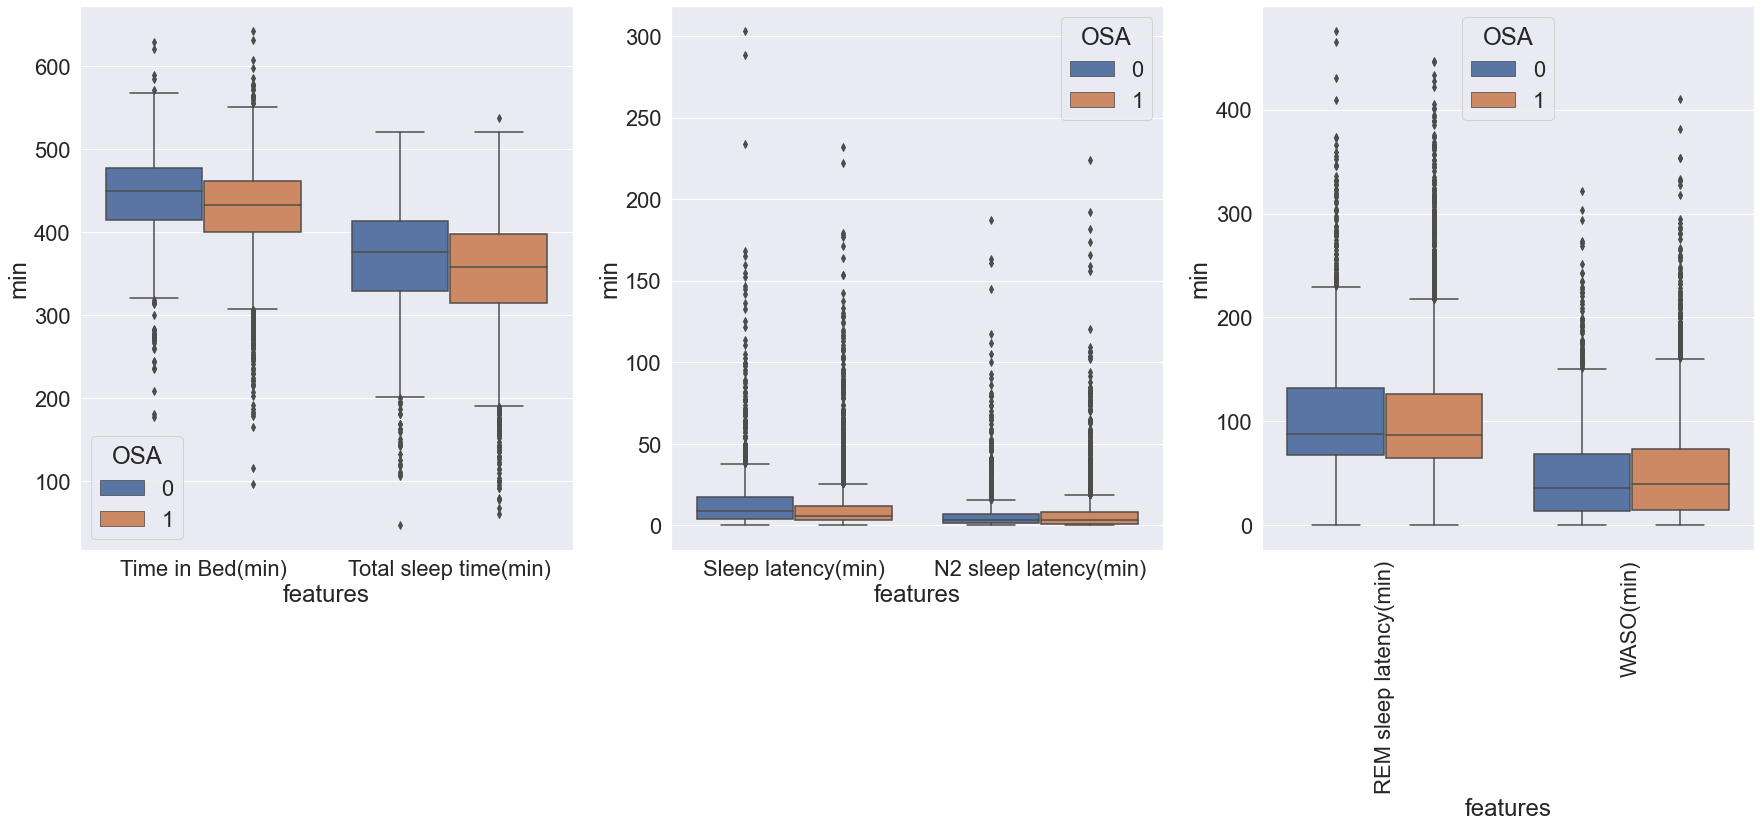

In [24]:
# 단위가 min인 데이터
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))

count = 0
for i in range(3):
    temp_data = pd.concat([data_diag, minutes_osa_data.iloc[:, count:count+2]], axis=1)
    count += 2
    temp_data = pd.melt(temp_data, id_vars="OSA", var_name="features", value_name="min")
    sns.boxplot(x="features", y="min", hue="OSA", data=temp_data, ax=axs[i])

plt.xticks(rotation=90)

In [31]:
# 두 feature 퍼센트를 합산한 것으로 100을 넘어갈 수 있음
percent_osa_data[percent_osa_data['Resp. Arousal /(A+H)(%)'] > 100]

,WASO(%),NON REM/TST(%),N1/TST(%),N2/TST(%),N3/TST(%),REM/TST(%),sleep efficiency(%),Sleep time on Back(%),Resp. Arousal /(A+H)(%),Baseline waking SaO2,Baseline sleep SaO2,Lowest SaO2 (%)
2027,4.9,77.3,16.2,60.5,0.6,22.7,92.6,85.1,220.0,98.0,98.0,95.0
3853,30.5,84.1,58.1,26.0,0.0,15.9,68.6,37.3,100.5,85.0,77.0,59.0
4565,13.1,78.3,54.5,23.8,0.0,21.7,85.6,100.0,100.2,93.0,93.0,76.0
5321,17.1,80.0,10.7,46.8,22.5,20.0,80.7,100.0,105.3,98.0,98.0,95.0
5344,9.0,80.8,19.3,47.1,14.4,19.2,89.1,78.0,103.7,98.0,98.0,90.0


<AxesSubplot:xlabel='features', ylabel='%'>

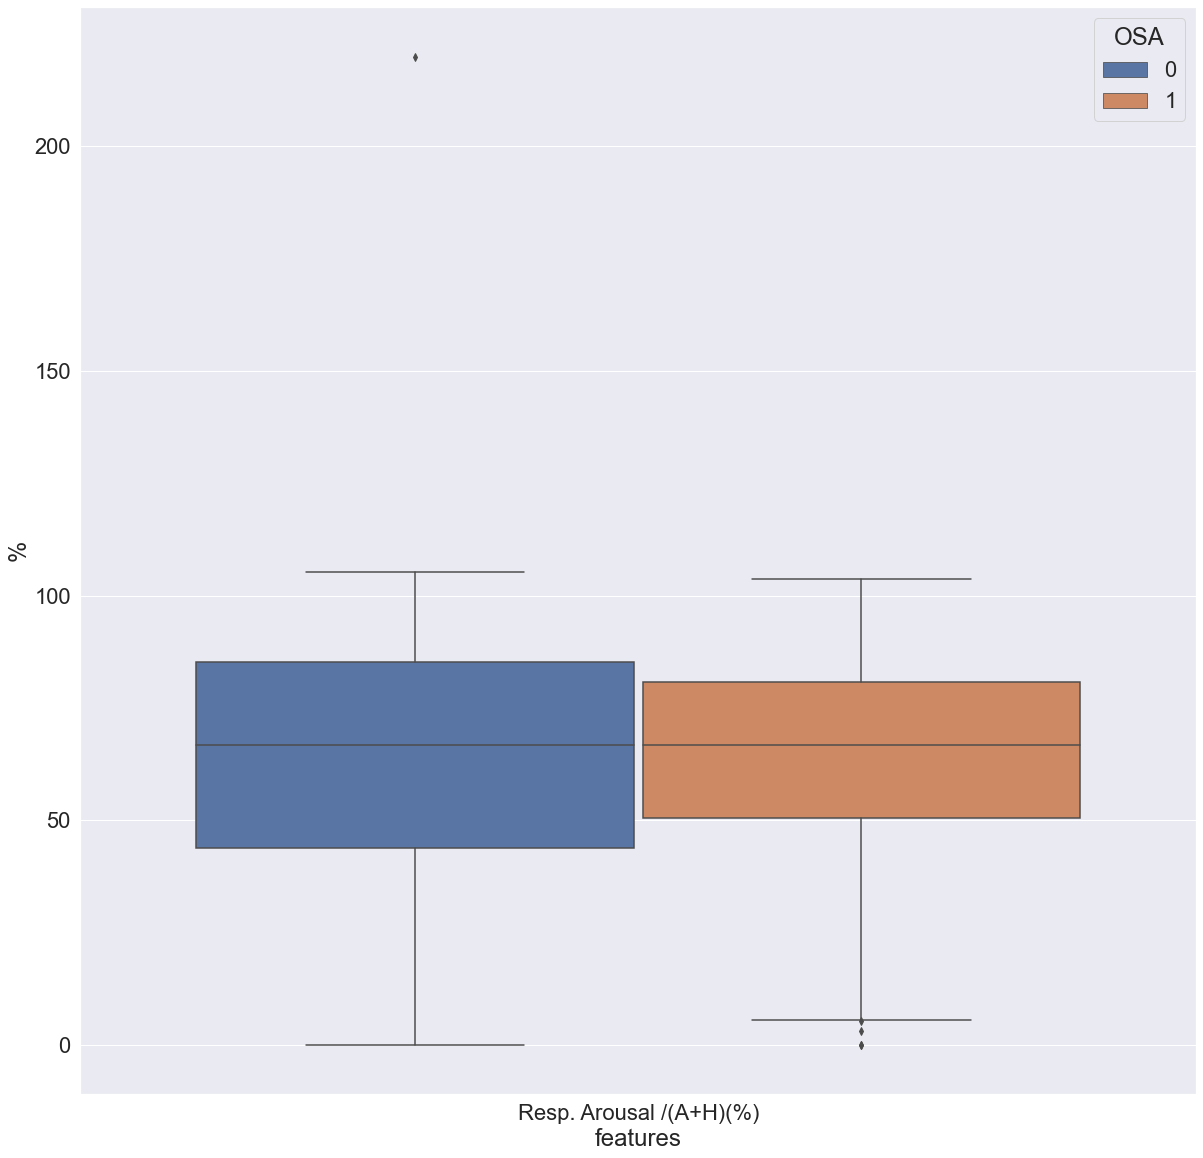

In [34]:
# 단위가 sec인 데이터
plt.figure(figsize=(20, 20))
data = pd.concat([data_diag, percent_osa_data['Resp. Arousal /(A+H)(%)']], axis=1)
data = pd.melt(data, id_vars="OSA", var_name="features", value_name="%")
sns.boxplot(x="features", y="%", hue="OSA", data=data)

(array([0, 1]),
 [Text(0, 0, 'Baseline sleep SaO2'), Text(1, 0, 'Lowest SaO2 (%)')])

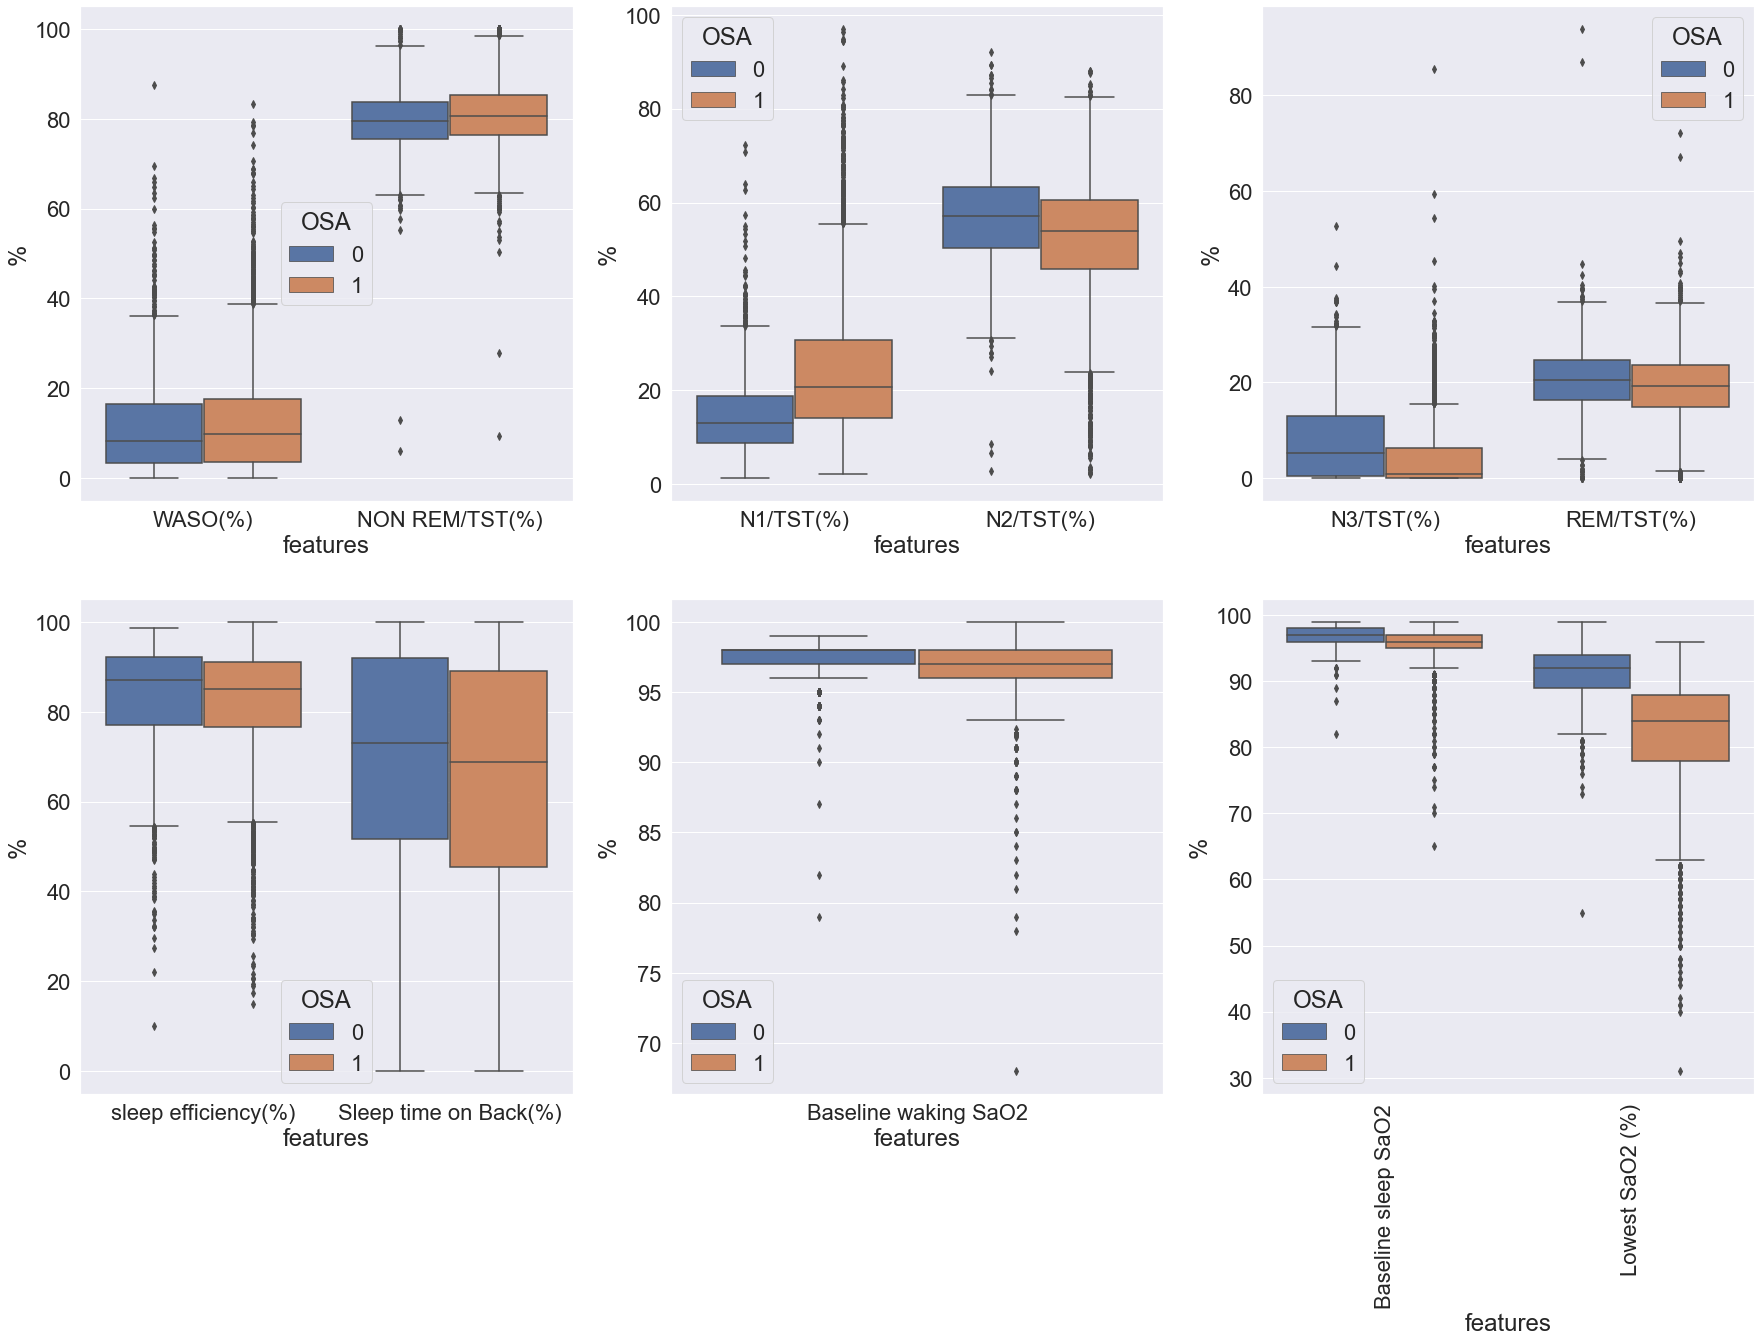

In [35]:
# 단위가 퍼센트인 데이터
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 20))

count = 0
for i in range(2):
    for j in range(3):
        temp_data = pd.concat([data_diag, percent_osa_data.iloc[:, count:count+2]], axis=1)
        count += 2
        if 'Resp. Arousal /(A+H)(%)' in temp_data.columns.values.tolist():
            temp_data.drop('Resp. Arousal /(A+H)(%)', axis=1, inplace=True)
        temp_data = pd.melt(temp_data, id_vars="OSA", var_name="features", value_name="%")
        sns.boxplot(x="features", y="%", hue="OSA", data=temp_data, ax=axs[i][j])

plt.xticks(rotation=90)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

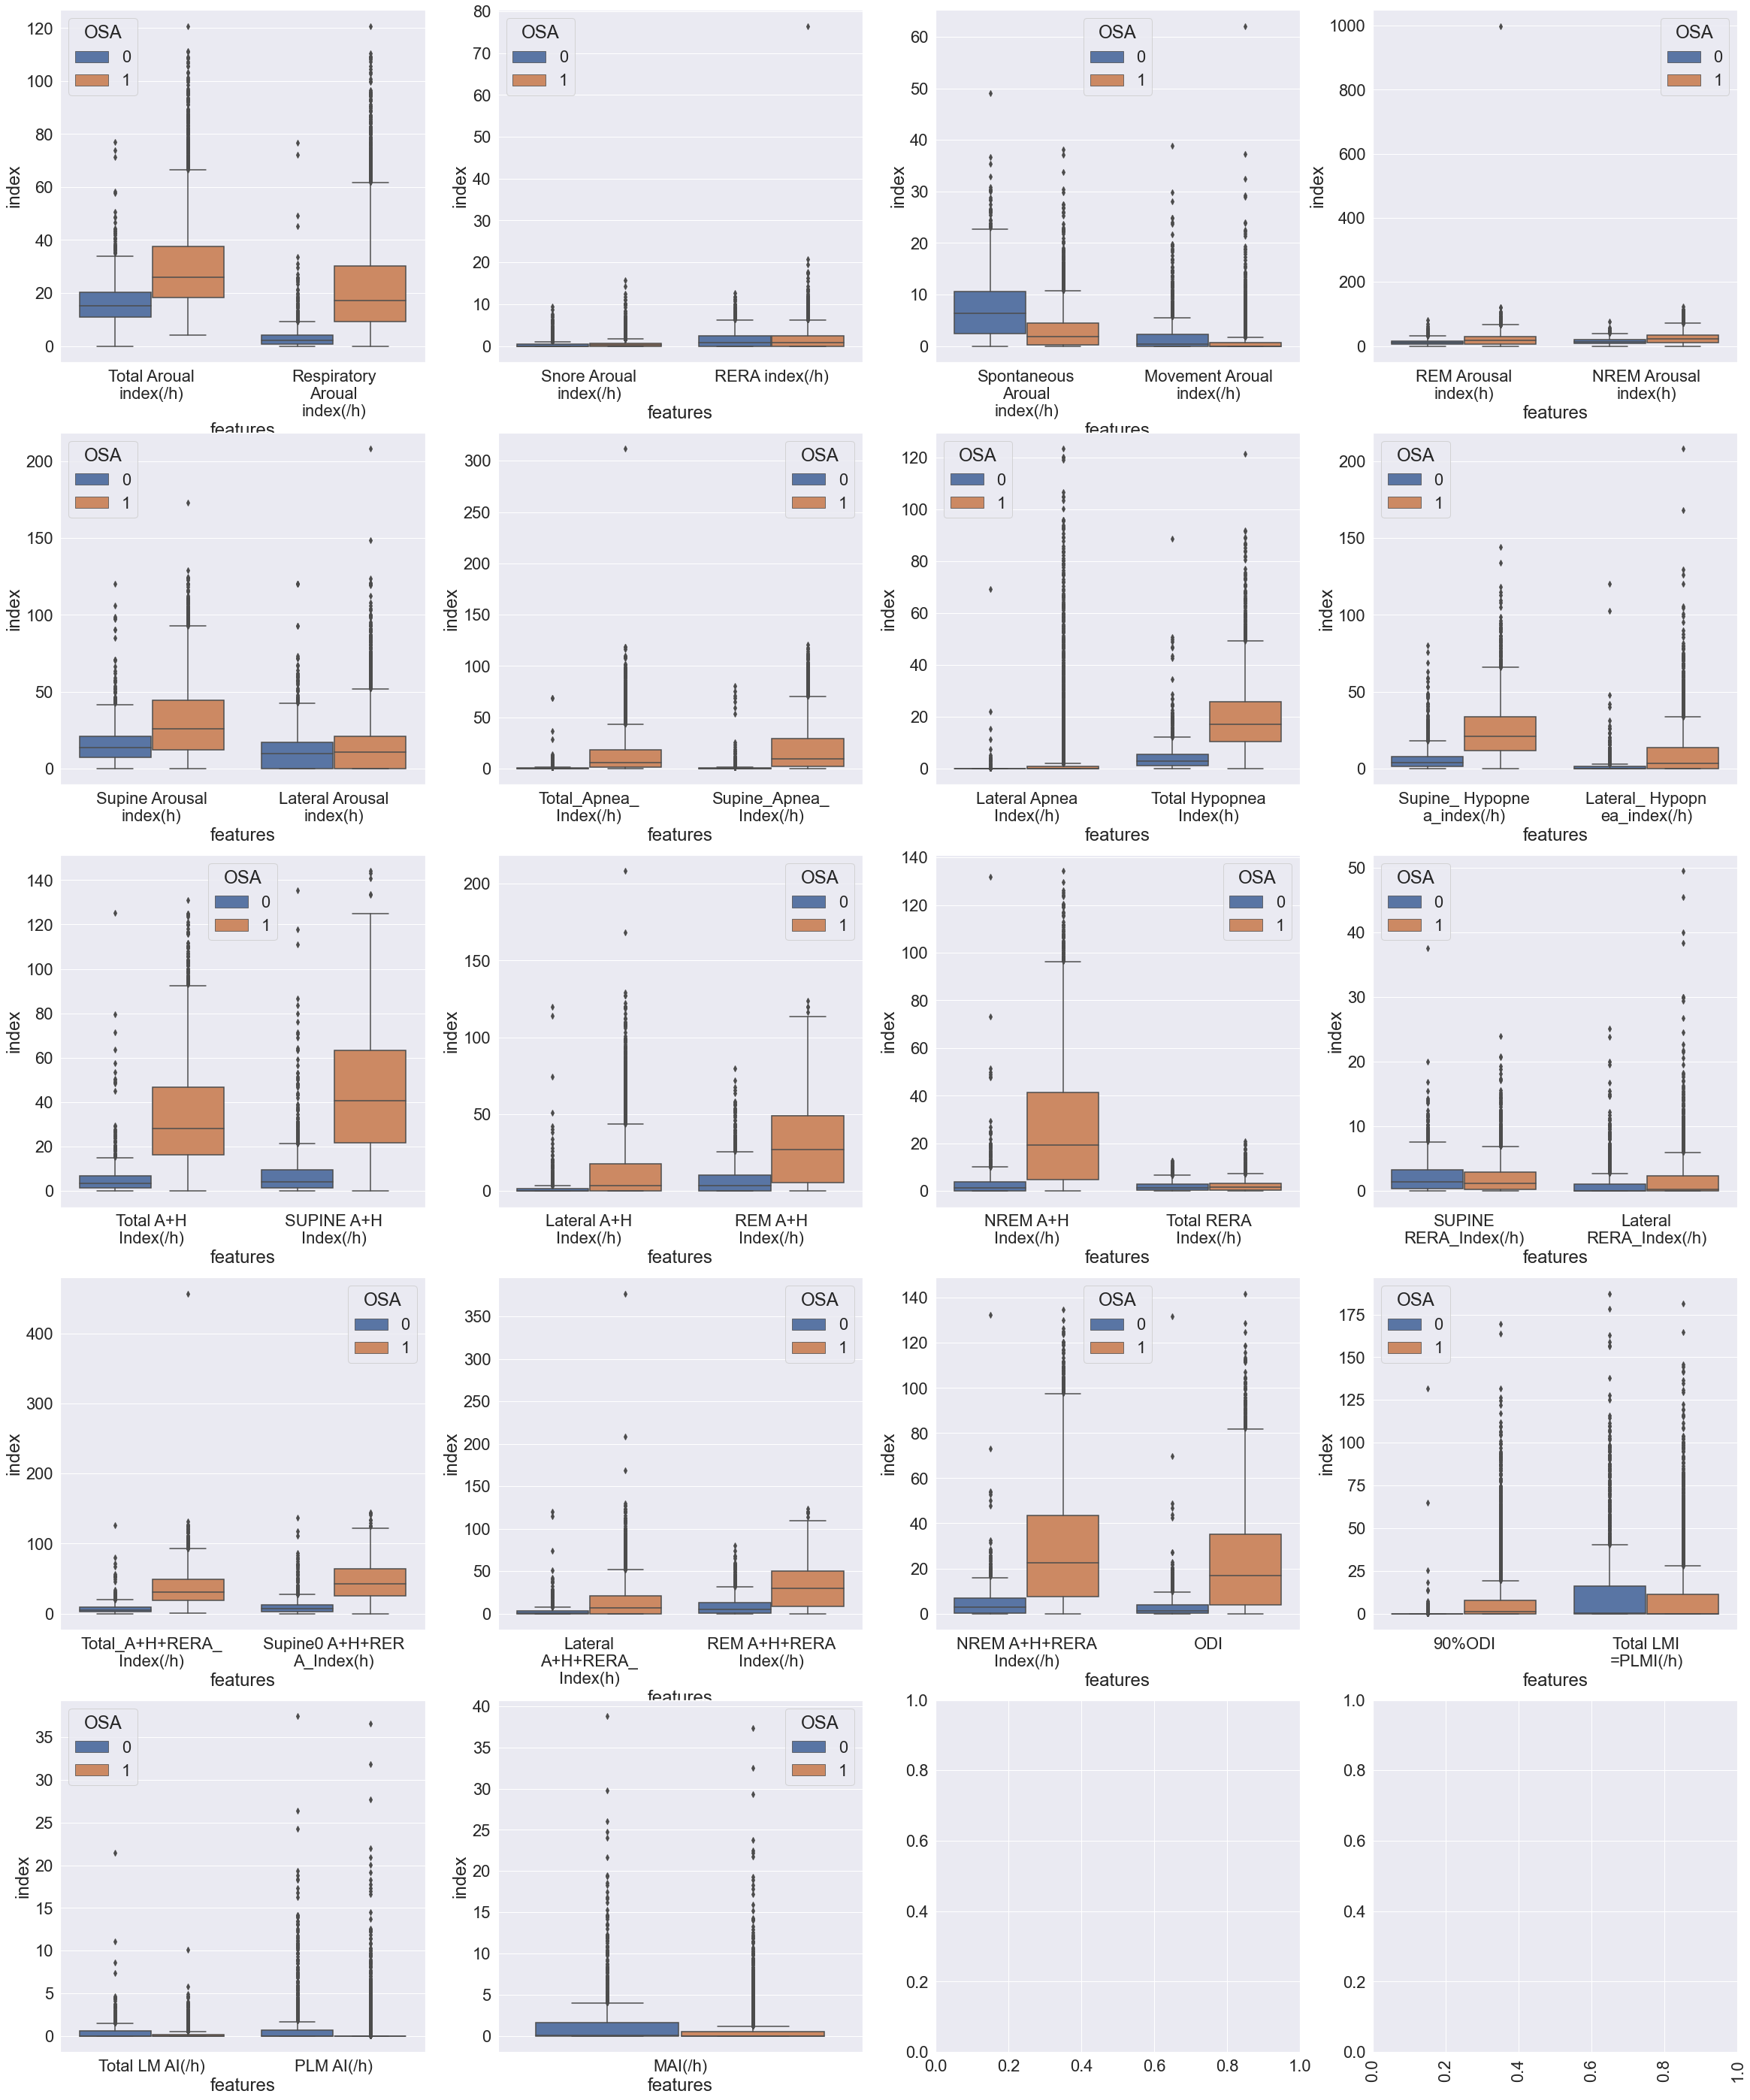

In [37]:
# 지수(index) 데이터
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(40, 50))

count = 0
for i in range(5):
    for j in range(4):
        if count >= len(index_osa_data.columns):
            break
        temp_data = pd.concat([data_diag, index_osa_data.iloc[:, count:count+2]], axis=1)
        count += 2
        temp_data = pd.melt(temp_data, id_vars="OSA", var_name="features", value_name="index")
        ax = sns.boxplot(x="features", y="index", hue="OSA", data=temp_data, ax=axs[i][j])
        ax.set_xticklabels([textwrap.fill(t.get_text(), 15)  for t in ax.get_xticklabels()])
        
plt.xticks(rotation=90)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

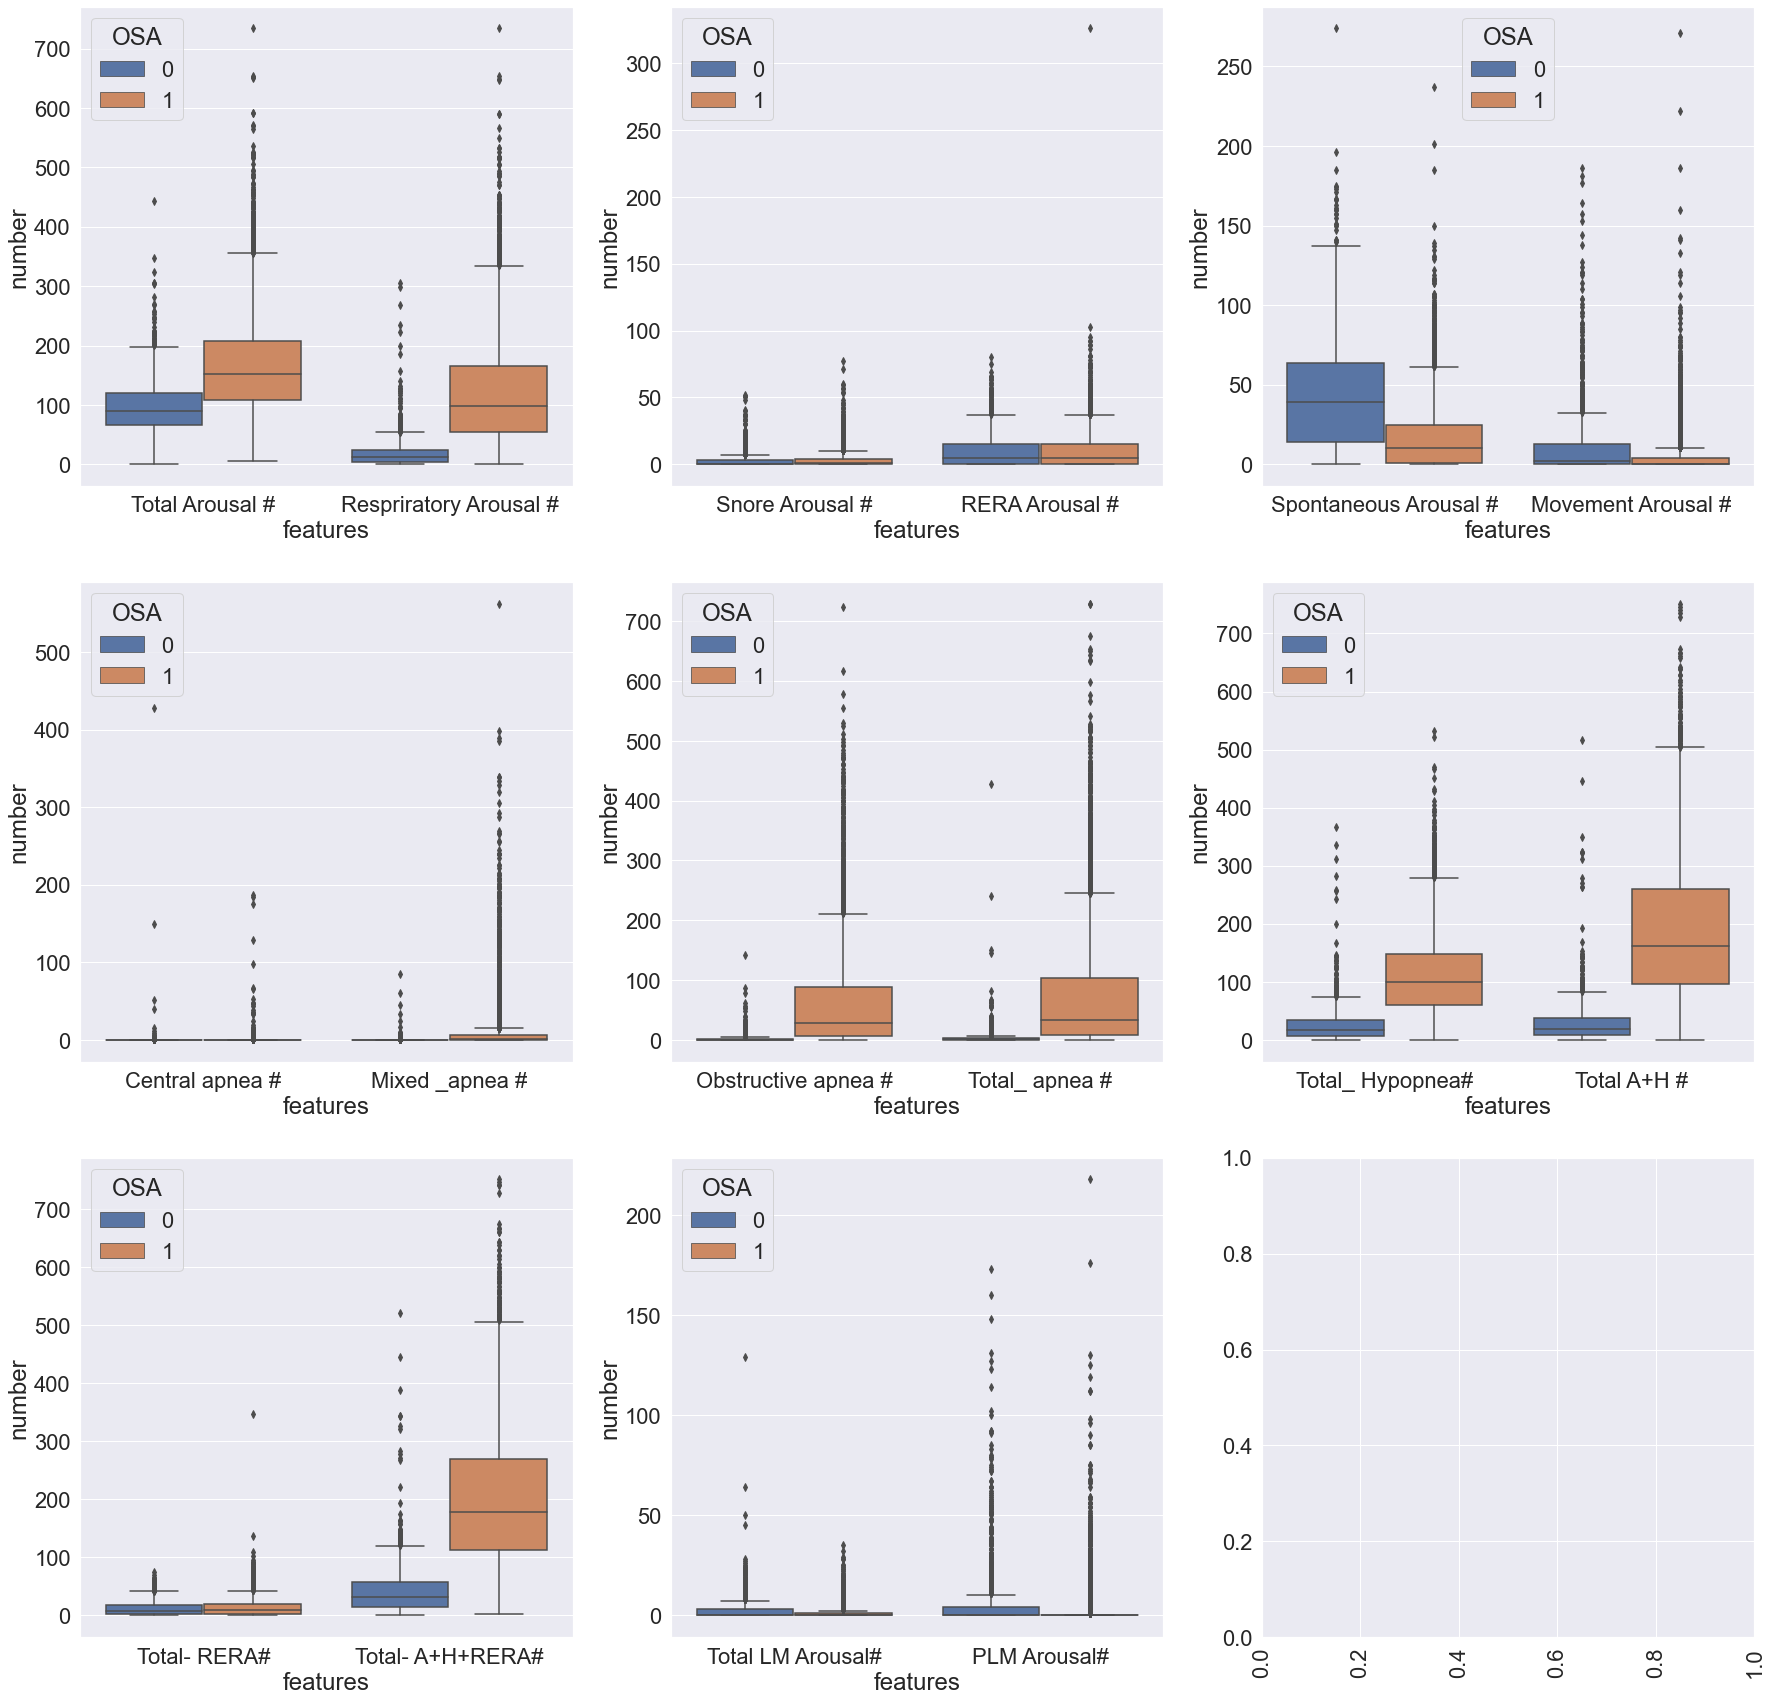

In [39]:
# 횟수 데이터
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(30, 30))

count = 0
for i in range(3):
    for j in range(3):
        if i == 2 and j == 2:
            break
        temp_data = pd.concat([data_diag, number_osa_data.iloc[:, count:count+2]], axis=1)
        count += 2
        temp_data = pd.melt(temp_data, id_vars="OSA", var_name="features", value_name="number")
        sns.boxplot(x="features", y="number", hue="OSA", data=temp_data, ax=axs[i][j])

plt.xticks(rotation=90)

<AxesSubplot:xlabel='features', ylabel='sec'>

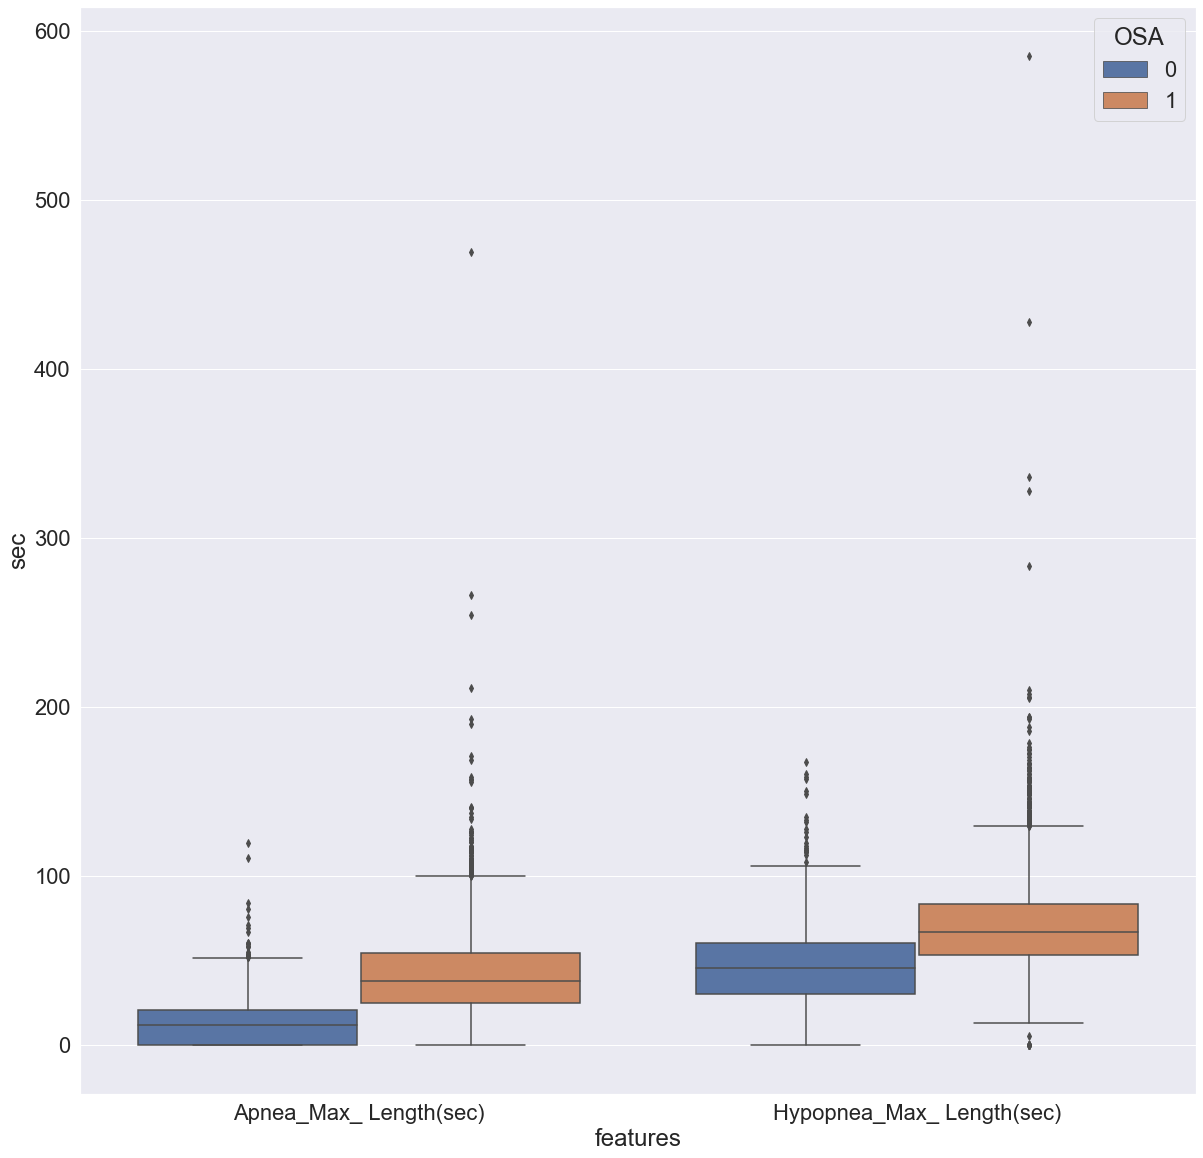

In [40]:
# 단위가 sec인 데이터
plt.figure(figsize=(20, 20))
temp_data = pd.concat([data_diag, seconds_osa_data], axis=1)
temp_data = pd.melt(temp_data, id_vars="OSA", var_name="features", value_name="sec")
sns.boxplot(x="features", y="sec", hue="OSA", data=temp_data)

In [60]:
# EtCO2의 경우 3개 record만 기록 존재(50mmHg넘는 record가 3개만 존재)
osa_data[osa_data['EtCO2 (>50mmHg)'] != 0]

,sex,age,OSA,height,weight,BMI,Time in Bed(min),Total sleep time(min),Sleep latency(min),N2 sleep latency(min),...,Lowest SaO2 (%),ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h)
944,1,60,1,150.0,45.0,20.0,424.5,383.5,0.5,4.5,...,45.0,49.9,169.4,42.5,41.9,3.0,0.5,4.0,0.6,1.1
3185,0,70,1,158.0,42.0,16.8,471.0,174.0,17.0,1.0,...,68.0,19.0,18.6,44.5,0.0,0.0,0.0,0.0,0.0,0.0
4786,0,14,0,149.0,57.0,25.7,540.5,345.5,1.0,14.5,...,92.0,0.9,0.0,16.0,18.8,27.0,4.7,31.0,5.4,10.1


In [41]:
body_measure = numerical_osa_data.iloc[:, 0:3]
body_measure.head()

,age,height,weight
0,52,167.0,60.0
1,65,166.0,53.0
2,53,174.0,74.0
3,53,163.0,63.5
4,55,150.0,61.0


In [42]:
height_missings = body_measure[body_measure['height'] == 999].index
body_measure = body_measure.drop(height_missings)
body_measure.head()

,age,height,weight
0,52,167.0,60.0
1,65,166.0,53.0
2,53,174.0,74.0
3,53,163.0,63.5
4,55,150.0,61.0


In [43]:
weight_missings = body_measure[body_measure['weight'] == 999].index
body_measure = body_measure.drop(weight_missings)
body_measure.head()

,age,height,weight
0,52,167.0,60.0
1,65,166.0,53.0
2,53,174.0,74.0
3,53,163.0,63.5
4,55,150.0,61.0


/var/folders/l6/j5nwgjg11zqbq0y11b2myyb00000gn/T/ipykernel_23453/3352535208.py:11: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  data = pd.melt(data, id_vars="OSA", var_name="features", value_name=unit)


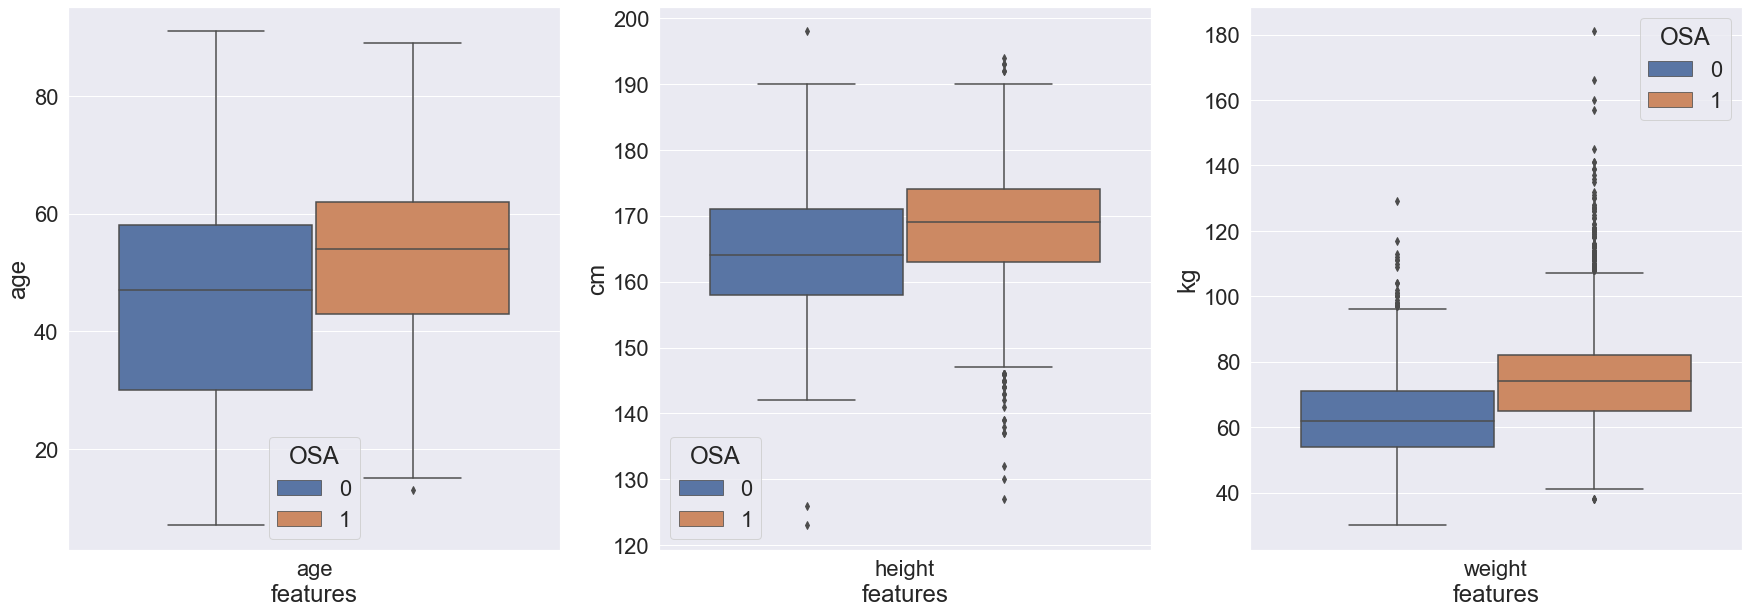

In [44]:
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))

for i, col in enumerate(body_measure.columns.values):
    data = pd.concat([data_diag, body_measure[col]], axis=1)
    if col == "age":
        unit = "age"
    elif col == "height":
        unit = "cm"
    elif col == "weight":
        unit = "kg"
    data = pd.melt(data, id_vars="OSA", var_name="features", value_name=unit)
    sns.boxplot(x="features", y=unit, hue="OSA", data=data, ax=axs[i])

In [74]:
numerical_osa_data_with_osa = pd.concat([data_diag, numerical_osa_data], axis=1)
osa_correlations = numerical_osa_data_with_osa.corr()['OSA'].sort_values()

print('most positive 15: \n', osa_correlations.tail(15))
print()
print('most negative 15: \n', osa_correlations.head(15))

most positive 15: 
 NREM A+H Index(/h)              0.410047
NREM A+H+RERA Index(/h)         0.412862
Supine_ Hypopnea_index(/h)      0.455063
Respiratory Aroual index(/h)    0.459181
Apnea_Max_ Length(sec)          0.469726
Respriratory Arousal #          0.482605
Total Hypopnea Index(h)         0.497443
Total_ Hypopnea#                0.508029
Total A+H Index(/h)             0.529930
Total_A+H+RERA_ Index(/h)       0.530131
Total A+H #                     0.542921
SUPINE A+H Index(/h)            0.556937
Total- A+H+RERA#                0.557196
Supine0 A+H+RERA_Index(h)       0.563109
OSA                             1.000000
Name: OSA, dtype: float64

most negative 15: 
 Lowest SaO2 (%)                -0.481850
Spontaneous Arousal #          -0.399738
Spontaneous Aroual index(/h)   -0.375199
Baseline sleep SaO2            -0.262611
N3/TST(%)                      -0.225037
Baseline waking SaO2           -0.214022
N2/TST(%)                      -0.162681
Movement Arousal #             

In [84]:
pos_corr_osa_data = numerical_osa_data_with_osa[osa_correlations[osa_correlations >= 0.4].index]
pos_corr_osa_data.corr()

,NREM A+H Index(/h),NREM A+H+RERA Index(/h),Supine_ Hypopnea_index(/h),Respiratory Aroual index(/h),Apnea_Max_ Length(sec),Respriratory Arousal #,Total Hypopnea Index(h),Total_ Hypopnea#,Total A+H Index(/h),Total_A+H+RERA_ Index(/h),Total A+H #,SUPINE A+H Index(/h),Total- A+H+RERA#,Supine0 A+H+RERA_Index(h),OSA
NREM A+H Index(/h),1.000000,0.994149,0.333707,0.752659,0.460593,0.718436,0.499906,0.443868,0.822919,0.792786,0.765091,0.719968,0.751289,0.708664,0.410047
NREM A+H+RERA Index(/h),0.994149,1.000000,0.334133,0.735952,0.448843,0.701617,0.494247,0.438130,0.804088,0.781203,0.746256,0.705445,0.739911,0.699745,0.412862
Supine_ Hypopnea_index(/h),0.333707,0.334133,1.000000,0.302933,0.080854,0.296592,0.832236,0.792262,0.430938,0.433598,0.414251,0.603413,0.423970,0.616201,0.455063
Respiratory Aroual index(/h),0.752659,0.735952,0.302933,1.000000,0.560909,0.947214,0.472215,0.396487,0.913720,0.884348,0.825780,0.813098,0.816071,0.806306,0.459181
Apnea_Max_ Length(sec),0.460593,0.448843,0.080854,0.560909,1.000000,0.588225,0.196945,0.201503,0.571390,0.549616,0.579982,0.524327,0.574084,0.515226,0.469726
Respriratory Arousal #,0.718436,0.701617,0.296592,0.947214,0.588225,1.000000,0.462549,0.465288,0.887308,0.859789,0.900930,0.795026,0.896106,0.788751,0.482605
Total Hypopnea Index(h),0.499906,0.494247,0.832236,0.472215,0.196945,0.462549,1.000000,0.940787,0.640346,0.632861,0.615468,0.618474,0.619231,0.621342,0.497443
Total_ Hypopnea#,0.443868,0.438130,0.792262,0.396487,0.201503,0.465288,0.940787,1.000000,0.586819,0.582043,0.653659,0.569570,0.662868,0.572697,0.508029
Total A+H Index(/h),0.822919,0.804088,0.430938,0.913720,0.571390,0.887308,0.640346,0.586819,1.000000,0.964000,0.943548,0.878863,0.932750,0.870043,0.529930
Total_A+H+RERA_ Index(/h),0.792786,0.781203,0.433598,0.884348,0.549616,0.859789,0.632861,0.582043,0.964000,1.000000,0.913856,0.854667,0.912051,0.853117,0.530131


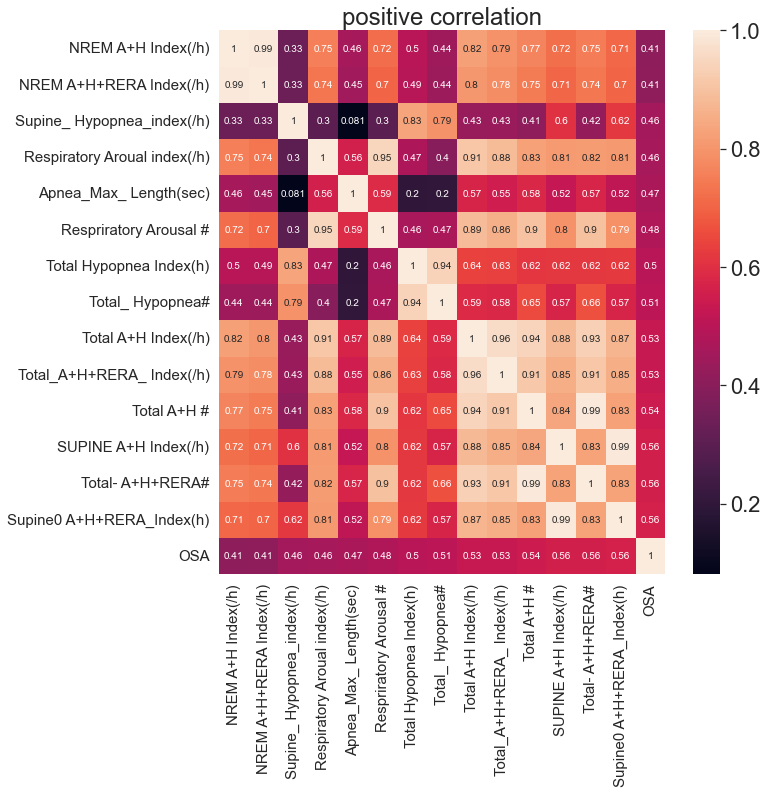

In [85]:
plt.figure(figsize=(10, 10))

sns.heatmap(pos_corr_osa_data.corr(), annot=True, annot_kws={"fontsize":10})
plt.title('positive correlation');
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

In [88]:
neg_corr_osa_data = numerical_osa_data_with_osa[osa_correlations[osa_correlations <= -0.2].index]
neg_corr_osa_data.corr()

,Lowest SaO2 (%),Spontaneous Arousal #,Spontaneous Aroual index(/h),Baseline sleep SaO2,N3/TST(%),Baseline waking SaO2
Lowest SaO2 (%),1.000000,0.391057,0.375951,0.544120,0.197263,0.412615
Spontaneous Arousal #,0.391057,1.000000,0.965732,0.203197,0.144270,0.148823
Spontaneous Aroual index(/h),0.375951,0.965732,1.000000,0.172505,0.125717,0.123628
Baseline sleep SaO2,0.544120,0.203197,0.172505,1.000000,0.180037,0.826690
N3/TST(%),0.197263,0.144270,0.125717,0.180037,1.000000,0.197979
Baseline waking SaO2,0.412615,0.148823,0.123628,0.826690,0.197979,1.000000


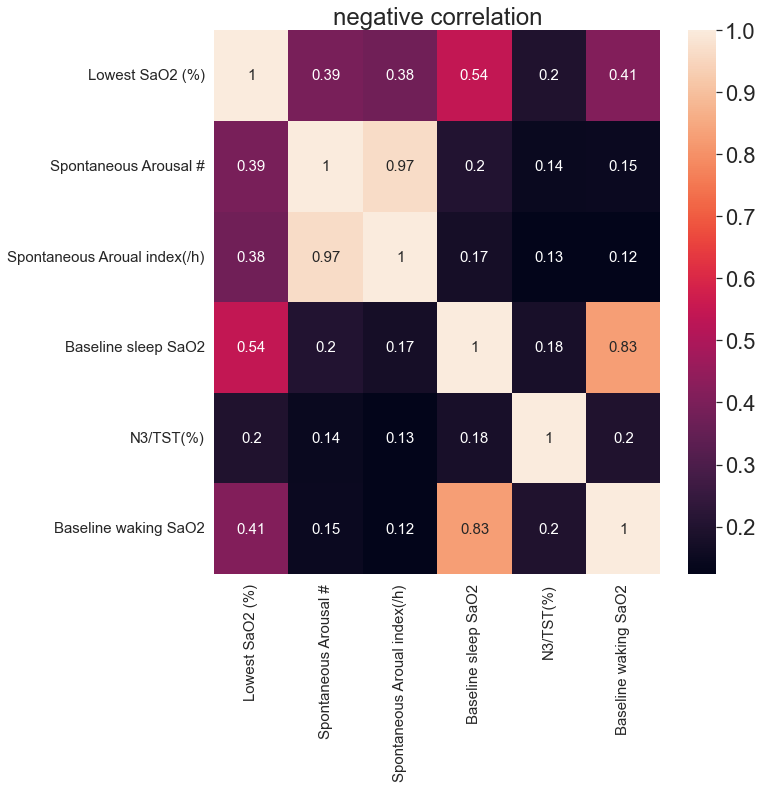

In [90]:
plt.figure(figsize=(10, 10))

sns.heatmap(neg_corr_osa_data.corr(), annot=True, annot_kws={"fontsize":15})
plt.title('negative correlation');
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);